# Accessing the data from *The Lord of the Rings* and *The Hobbit* via Github.

In [ ]:
import os
import logging
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["pdf.fonttype"] = 42

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!wget -nc https://raw.githubusercontent.com/wess/iotr/master/lotr.txt

--2023-05-10 12:08:31--  https://raw.githubusercontent.com/wess/iotr/master/lotr.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3262595 (3.1M) [text/plain]
Saving to: ‘lotr.txt’

lotr.txt            100%[===================>]   3.11M  --.-KB/s    in 0.07s   

2023-05-10 12:08:31 (42.0 MB/s) - ‘lotr.txt’ saved [3262595/3262595]



# Corpus.

In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus: #data loader
    def __init__(self):
      self.lines = []
      files = os.listdir(".") #Alternative: import glob
      files = [file for file in files if file.endswith(".txt")] 
      files  = sorted(files)
      print(f"Found {len(files)} files")

      for file in files:
        for line in open(file):
          self.lines += [line] 

    def __iter__(self):
      for line in self.lines:
        yield utils.simple_preprocess(line)

instance = MyCorpus()
print(instance.lines[:8])

Found 1 files
['####-SPECIAL NOTE: \n', '\n', ' \n', 'In this reprint several minor inaccuracies, most of them noted by readers, have \n', 'been corrected. For example, the rune text now corresponds exactly with the runes \n', "on  Thror's  Map.  More  important  is  the  matter  of  Chapter  Five.  There  the  true \n", 'story  of  the  ending  of  the  Riddle  Game,  as  it  was  eventually  revealed  (under \n', 'pressure)  by Bilbo  to Gandalf,  is  now  given  according  to  the Red Book,  in  place \n']


# Design a Neural Network.

In [ ]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec( #creation of a neural network
    sentences=sentences,
    sg=1,
    vector_size=10,
    window=20,
    min_count=3,
    epochs=100,
    alpha=0.01,
    workers=multiprocessing.cpu_count()
)
print("Done")

Found 1 files
Done


# Search for words comparable to Frodo.

In [ ]:
model.wv.most_similar("frodo", topn=20) #

[('hesitating', 0.9813940525054932),
 ('sam', 0.9752783179283142),
 ('he', 0.9551633596420288),
 ('pippin', 0.9529532790184021),
 ('caution', 0.9396676421165466),
 ('impatiently', 0.9351738095283508),
 ('departing', 0.9326622486114502),
 ('stammered', 0.929969310760498),
 ('wizard', 0.9259306788444519),
 ('muttered', 0.923812747001648),
 ('twice', 0.9205424189567566),
 ('relief', 0.9161067605018616),
 ('strider', 0.9126315116882324),
 ('sidelong', 0.910316526889801),
 ('whispered', 0.9096779227256775),
 ('considering', 0.9058429598808289),
 ('handling', 0.9056010842323303),
 ('reply', 0.9024834632873535),
 ('thought', 0.9014333486557007),
 ('gasped', 0.9009160399436951)]

# Plot a heatmap of selected words from the works.

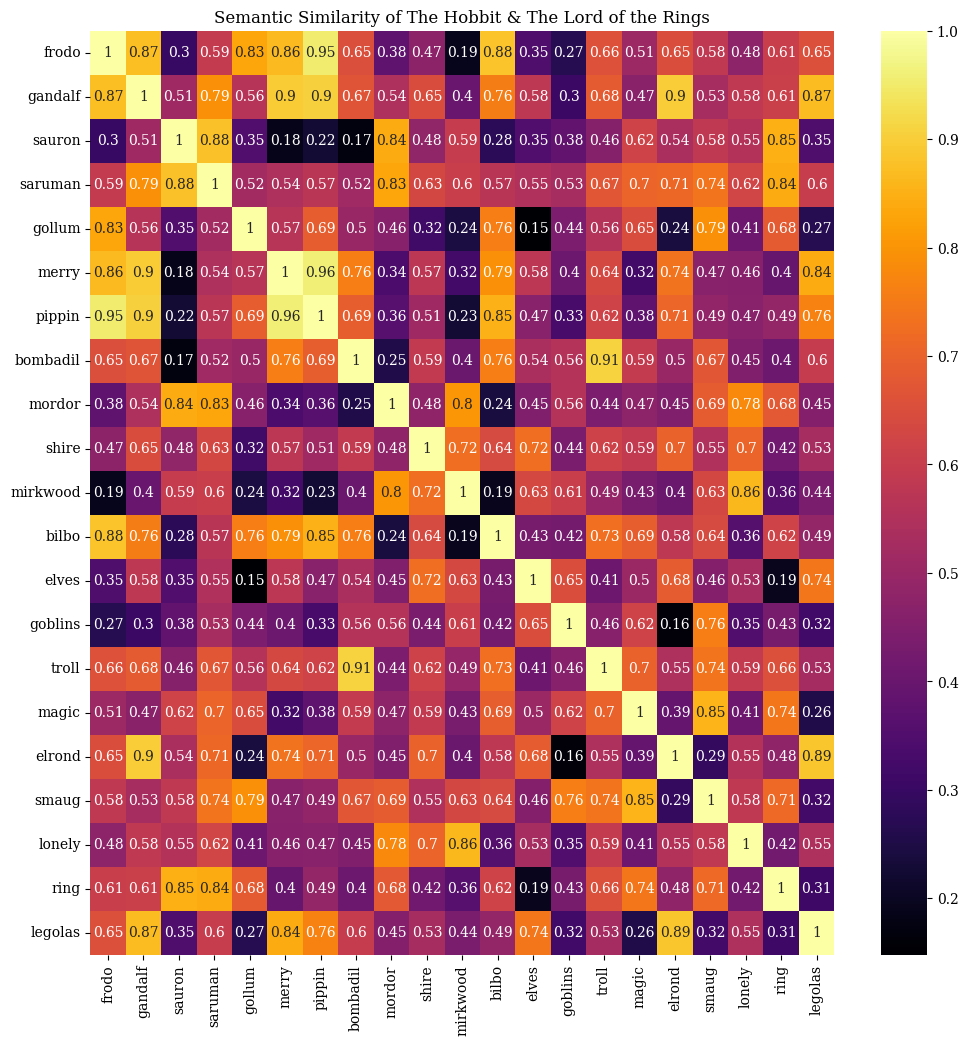

In [ ]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity of The Hobbit & The Lord of the Rings")
            
words = [
    "frodo",
    "gandalf",
    "sauron",
    "saruman",
    "gollum",
    "merry",
    "pippin",
    "bombadil",
    "mordor",
    "shire",
    "mirkwood",
    "bilbo",
    "elves",
    "goblins",
    "troll",
    "magic",
    'elrond',
    'smaug',
    'lonely',
    'ring',
    'legolas'
]
plot_similarities(words)